# Election Data Analysis of Polls and Donors

In this notebook, we will take a look at two datasets regarding the 2012 presidential election (provided by the Huffington Post and Udemy). The first dataset is for polling data, provided by the Huffington Post. The second dataset was obtain from Jose Portilla's Udemy course 'Learning Python for Data Analysis and Visualization' and contains donation data for the 2012 Election candidates.

The goal of this notebook is to see if we can find any interesting insights from these data using visualization and data manipulation techniques.

In [5]:
# Import our data handling/visualization libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from pandas import Series, DataFrame

In [6]:
# We need the requests library to access the page containing the relevant data.
# We also need StringIO to process the text prior to placing it in a DataFrame.
import requests

from io import StringIO

# Dataset 1 - Polling Data

In [7]:
url = 'http://elections.huffingtonpost.com/pollster/2012-general-election-romney-vs-obama.csv'

source = requests.get(url).text

poll_data = StringIO(source)

In [8]:
df_poll = pd.read_csv(poll_data)

Let's take a look at an overview of the data, to see how many rows/columns we are dealing with as well as what type of columns we have.

In [9]:
df_poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Data columns (total 17 columns):
Pollster                  586 non-null object
Start Date                586 non-null object
End Date                  586 non-null object
Entry Date/Time (ET)      586 non-null object
Number of Observations    564 non-null float64
Population                586 non-null object
Mode                      586 non-null object
Obama                     586 non-null float64
Romney                    586 non-null float64
Undecided                 423 non-null float64
Other                     202 non-null float64
Pollster URL              586 non-null object
Source URL                584 non-null object
Partisan                  586 non-null object
Affiliation               586 non-null object
Question Text             0 non-null float64
Question Iteration        586 non-null int64
dtypes: float64(6), int64(1), object(10)
memory usage: 78.0+ KB


As we usually do, we will look at the first 5 rows of the dataframe to see what our data actually look like.

In [10]:
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


## Checking Demographics of poll populations

One of the first things we can do is visualize the data to see if we can discover any isnights from our visualizations. For starters, let's use seaborn's catplot function with kind='count' to see how many of these polls come from partisan and non-partisan sources.

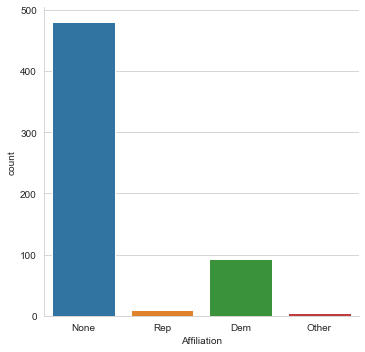

In [11]:
sns.catplot('Affiliation',data=df_poll,kind='count') # factorplot has been deprecated in favor of catplot.
                                                     # Also, must specify kind= 'count'

It looks like a vast majority of the polls come from non-partisan sources, which is pretty helpful in trying to avoid bias in our insights. An interesting thing to note is that there are still a fair amount of polls affiliated with Democratic sources in this dataset. One possible explanation is that since these data come from the Huffington Post (viewed as left-leaning by people), it's possible that they have easier access to polls from Democrat-affiliated sources. I don't think there is any conclusive evidence of this that can be drawn from this visualization alone, however.

All that aside, we can actually split the data further and see which demographics of people were reached by these polls by adding the "hue" argument to our catplot and choosing the "Population" column.

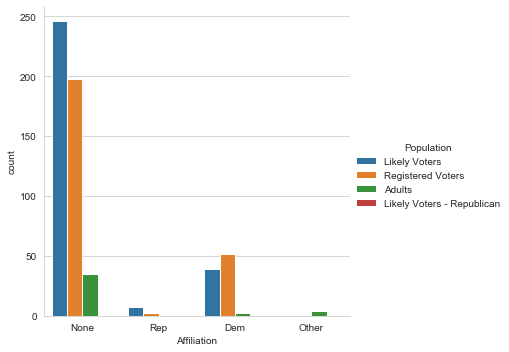

In [12]:
sns.catplot('Affiliation',data=df_poll,hue='Population',kind='count')

We now have some context into which demographics these polls have reached. It looks here like a vast majority of the people responding to these polls are either "Likely Voters" or "Registered Voters". There is a category "Likely Voters - Republican" which technically is a subset of "Likely Voters", but we don't really plan to do further analysis with this part of the data, so there's no reason to clean this specific thing up for now.

## Cleaning the data for further use

A common occurrance while looking at data is that we come accross data that we don't quite find useful for the questions we want to answer (unused columns, null values, etc). As a result, we need to clean the data to make accessing the relevant data easier for us.

Our goal now is took look at the mean polling percents for Obama and Romney. Let's take a look at the head of our dataframe again to see if we can find data that would be less than helpful for this.

In [13]:
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


Let's make a new DataFrame that's the means of all the numerical columns. If we were to take the mean of this DataFrame, we would only get numerical columns returned. Again, we only really care for the polling percents of Obama, Romney, Undecided, or Other. That means in our mean dataframe, we should drop the "Number of Obeservations," "Question Text," and "Question Iteration" columns, since we don't really care about them

In [14]:
avg = pd.DataFrame(df_poll.mean())
avg.drop('Number of Observations',axis=0,inplace=True)
avg.drop('Question Text',axis=0,inplace=True)
avg.drop('Question Iteration',axis=0,inplace=True)

In [15]:
avg.head()

,0
Obama,46.805461
Romney,44.614334
Undecided,6.550827
Other,3.376238


It looks like among all the polls, Obama was polling higher, on average, than Romney. Let's also take a look at the standard deviations for our values as well. The process will be similar to how we created our mean dataframe:

In [16]:
std = DataFrame(df_poll.std())
std.drop('Number of Observations',axis=0,inplace=True)
std.drop('Question Text', axis=0,inplace=True)
std.drop('Question Iteration', axis=0,inplace=True)

In [17]:
std.head()

,0
Obama,2.422058
Romney,2.906180
Undecided,3.701754
Other,2.692726


It looks like the standard deviation for Obama's polling numbers was slightly lower than Romney's. This means that the polling numebrs for Obama were slightly more consistent than Romney's, but not by a significant amount.

Since we have our mean dataframe, we can plot this too. This will allow us to show a visual representation of what we noticed from the numbers above:

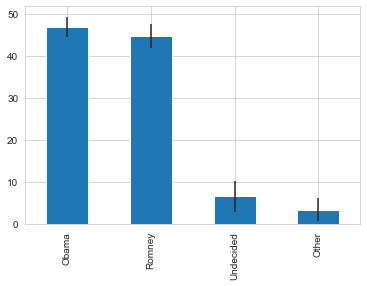

In [18]:
avg.plot(yerr=std,kind='bar',legend=False)

Instead of having two separate DataFrames for our mean and standard deviations, we can combine them to have the data readily available to us in one convenient DataFrame:

In [19]:
df_poll_avg = pd.concat([avg,std],axis=1)

In [20]:
df_poll_avg.head()

,0,0
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


In [21]:
df_poll_avg.columns = ['Average', 'STD']

In [22]:
df_poll_avg

,Average,STD
Obama,46.805461,2.422058
Romney,44.614334,2.906180
Undecided,6.550827,3.701754
Other,3.376238,2.692726


## Visualizing Data over Time

One interesting thing we can do with election data is check out a candidate's performance over time, and see if there were any major points that swung public opinion one way or another. Fortunately, Our dataset does contain dates for when the polls occurred, so we can use that data for some further visualization and insight!

Let's make a scatterplot for each candidates' polling numbers and see if we can find anything interesting from the plot.

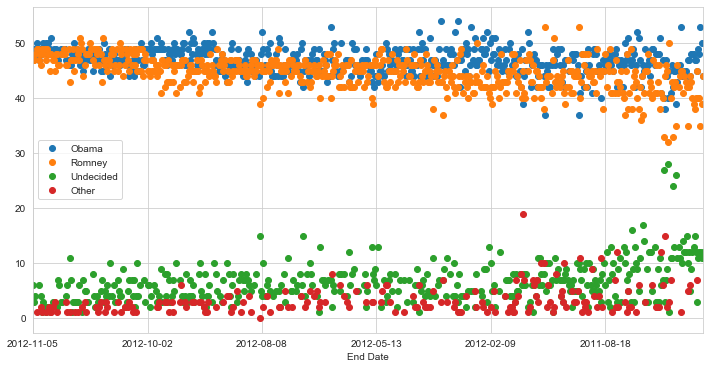

In [25]:
df_poll.plot(x='End Date',y=['Obama','Romney','Undecided','Other'],linestyle='',marker='o',figsize=(12,6))

This plot is kind of cluttered, so it's hard to see if there's anything useful from this alone. One thing we can kidn of notice is that the closer we get to the 2012 election, the more some of the poll numbers seem to scatter. There's not really much we can do with that information alone, though.

Let's create a new column in our DataFrame, called 'Difference' that will be the percentage point difference between Obama and Romney for a particular poll. This will help us get a better visual for the relative perormance of each candidate.

In [28]:
df_poll['Difference'] = (df_poll.Obama - df_poll.Romney)/100

In [29]:
df_poll.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration,Difference
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1,0.00
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1,0.02
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1,0.00
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1,0.01
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1,-0.01


Now that we have our new column, let's use Pandas' groupby function to sort the data by date, and then use a scatterplot to plot the differences in chronological order:

In [30]:
df_poll = df_poll.groupby(['Start Date'],as_index=False).mean()

df_poll.head()

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,NaN,NaN,1,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,NaN,NaN,1,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,NaN,NaN,1,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,NaN,NaN,1,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,NaN,NaN,1,0.09


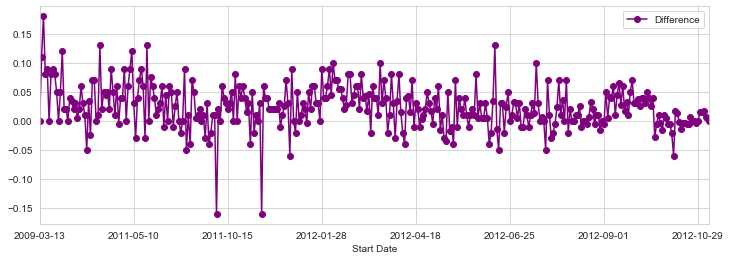

In [31]:
df_poll.plot('Start Date', 'Difference',figsize=(12,4),marker='o',linestyle='-',color='purple')

Since these datapoints span a long period of time (2009-2012), it will be hard to find anything substantial from this plot alone, so let's take a focus on the period of time when the debates happened (Oct 2012). To do that, we will need to extract the data manually. Since we know that all the dates are conveniently formatted as 'YYYY-MM-DD', we can use this to our advantage by iterating over the data and marking the indexes where the date begins with '2012-10'.

In [32]:
row_in = 0
xlimit = []

for date in df_poll['Start Date']:
    if date[0:7] == '2012-10':
        xlimit.append(row_in)
        row_in += 1
    else:
        row_in += 1

print(min(xlimit))
print(max(xlimit))

325
352


It looks like the indices don't have a difference of 31, meaning that there will be dates omitted from the month of October, this means that we should probably see what dates we have available to us, and to cross reference if the debate dates are in that slice of the dataset.

In [36]:
df_poll.iloc[325:353]

,Start Date,Number of Observations,Obama,Romney,Undecided,Other,Question Text,Question Iteration,Difference
325,2012-10-01,1746.000000,48.500000,46.000000,3.000000,NaN,NaN,1,0.025000
326,2012-10-02,590.000000,49.000000,45.000000,6.000000,NaN,NaN,1,0.040000
327,2012-10-04,1061.500000,45.833333,48.666667,6.000000,NaN,NaN,1,-0.028333
328,2012-10-05,1000.000000,46.000000,46.500000,7.000000,1.000000,NaN,1,-0.005000
329,2012-10-06,895.000000,46.500000,45.500000,4.500000,3.000000,NaN,1,0.010000
330,2012-10-07,1197.333333,47.000000,47.333333,4.666667,1.500000,NaN,1,-0.003333
331,2012-10-08,2030.000000,46.500000,48.000000,5.000000,2.000000,NaN,1,-0.015000
332,2012-10-10,1118.000000,48.000000,47.000000,3.500000,2.000000,NaN,1,0.010000
333,2012-10-11,1335.250000,47.000000,46.500000,5.666667,1.666667,NaN,1,0.005000
334,2012-10-12,1231.500000,46.500000,47.000000,6.500000,NaN,NaN,1,-0.005000


As a reminder, the debates happened on Oct 3rd, Oct 16th, and Oct 22nd. Of those dates, only Oct 3rd is not in this slice, but the 2nd and 4th are, so we can infer what happened based on what the slope bewtween these two points looks like.

First, we will make the same plot as above, but we will restrict the window the indices for the month of October. Next, we will create three verticle lines on the indices 327, 338, and 343 to mark the dates of the debate (for the case of index 327, it will be to mark the next day's effect).

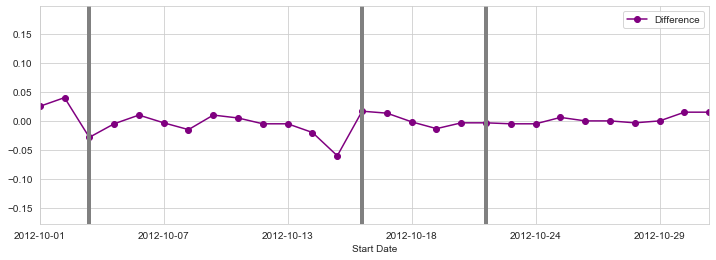

In [37]:
df_poll.plot('Start Date', 'Difference',figsize=(12,4),marker='o',linestyle='-',color='purple',xlim=(325,352))

# Oct 3rd
plt.axvline(x=327,lw=4,color='grey')

# Oct 16th
plt.axvline(x=338,lw=4,color='grey')

# Oct 22nd
plt.axvline(x=343,lw=4,color='grey')

From this plot, we can notice a few things:
 - After October 3rd's debate, there was a fairly large shift in favor of Romney
 - We see a fairly large shfit in favor of Obama before the debate on October 16th. After October 16th's debate, however, there wasn't    really any major swing
 - After October 22nd's debate, there was virtually no shift at all.

### Takeaways

We were able to work with the data a lot and find some cursory insights based off of what we did. However, we did not exhaust all the possibilities of what we could have done. A few other things we could have tried were:
 - We could have removed all partisan polls from our data and see if there was any significant effect on our earlier work.
 - We could have looked at other various windows on our chronological scatterplot above and see if any major news events coincided with swings in public opinion
 
Needless to say, there are thigns not listed above that we could do as well.

# DataSet 2 - Donor Dataset

This datatset contains informations regarding campaign contributions to Candidates durign the 2012 election. It contains information such as donation amount, location, and occupation, to name a few. With this dataset, we hope to obtain some insights regarding which demographics contributed to which candidates and if there are any trends among the contributions.

In [42]:
# As a note, the csv file won't be available with this notebook on github due to the filesize exceeding github's maximum limit.
df_donor = pd.read_csv('Election_Donor_Data.csv')

Let's take a look at an overview of the data:

In [44]:
df_donor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
cmte_id              1001731 non-null object
cand_id              1001731 non-null object
cand_nm              1001731 non-null object
contbr_nm            1001731 non-null object
contbr_city          1001712 non-null object
contbr_st            1001727 non-null object
contbr_zip           1001620 non-null object
contbr_employer      988002 non-null object
contbr_occupation    993301 non-null object
contb_receipt_amt    1001731 non-null float64
contb_receipt_dt     1001731 non-null object
receipt_desc         14166 non-null object
memo_cd              92482 non-null object
memo_text            97770 non-null object
form_tp              1001731 non-null object
file_num             1001731 non-null int64
dtypes: float64(1), int64(1), object(14)
memory usage: 122.3+ MB


It looks like our data has over a million rows of data (which is a lot more than the last dataset)! we can see some useful columns like contb_receipt_amt, which is the amount of money donated, and contbr_occupation, which is the contributor's  occupation.

Let's also look at the first five rows to get familiar with how the data look:

In [45]:
df_donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166


## Looking at Donation Amounts

Since we will be working with the 'contb_receipt_amt' column, let's take a look at it, as well as some curosry statistics, to see if we can derive any summary statistics from them.

In [48]:
df_donor['contb_receipt_amt'].value_counts()

100.00    178188
50.00     137584
25.00     110345
250.00     91182
500.00     57984
           ...  
97.15          1
122.32         1
188.65         1
122.40         1
132.12         1
Name: contb_receipt_amt, Length: 8079, dtype: int64

In [47]:
don_mean = df_donor['contb_receipt_amt'].mean()
don_std = df_donor['contb_receipt_amt'].std()

print ('The average donation was %.2f with a std %.2f' %(don_mean,don_std))

The average donation was 298.24 with a std 3749.67


We see that  the average is around $300 for a contribution, yet the standard deviation is really massive. This means that there are some large datapoints that are heavily influencing the standard deviation.

In [49]:
top_donor = df_donor['contb_receipt_amt'].copy()

top_donor.sort_values(ascending=False).head()

325136    2014490.51
326651    1944042.43
344539    1679114.65
344419    1511192.17
319478     526246.17
Name: contb_receipt_amt, dtype: float64

These are some massive donations! Since it's more likely that really large donations are by PACs and SuperPACs, let's limit our scope to donations within the $2500 range.

Also, another thing to point out, is that there do exist values below zero in this dataset (this means that those were donations that got refunded). Since those will also skew our data, we will limit the lower bound of our data scope to $0

In [50]:
top_donor = top_donor[top_donor > 0]

top_donor.value_counts().head(10)

100.0     178188
50.0      137584
25.0      110345
250.0      91182
500.0      57984
2500.0     49005
35.0       37237
1000.0     36494
10.0       33986
200.0      27813
Name: contb_receipt_amt, dtype: int64

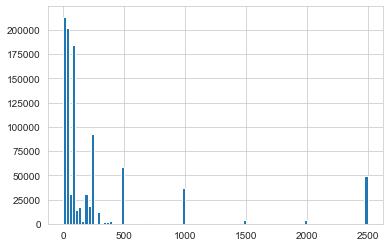

In [51]:
com_don = top_donor[top_donor <= 2500]

com_don.hist(bins=100)

Looking at the visualization for donation amount frequencies, we can see that donation amounts under 500 are by far the most common, especially round numbers like 100,150,200,etc. We also notice that for amounts above 500, there are two bumps in frequency around 1000 and 2500, which is pretty interesting

## Donations by Candidate

While we can look into the statistics surrounding donation amounts all day, we can gain greater insights by checking how these donation amounts relate to the candidates. First, we will create a column in our DataFrame called "Party" that will categorize each donation as a donation to a Democratic Candidate or Republican one. We do this by mapping each candidate to their affiliated party via dictionary and applying a mapping function on the 'cand_nm' column with this mapping dictionary.

In [52]:
candidates = df_donor.cand_nm.unique()

candidates

array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [53]:
# Dictionary of party affiliation

party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

df_donor['Party'] = df_donor.cand_nm.map(party_map)

In [56]:
# we also need to remove negative contributions, as those are not particularly helpful to us
df_donor = df_donor[df_donor.contb_receipt_amt >0]

In [57]:
df_donor.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,Party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


Now that we have our Party column, let's do some grouping and see how many unique contributions there were per candidate, and what the sum of the contributions were:

In [85]:
dF_donor.groupby('cand_nm')['contb_receipt_amt'].count()

cand_nm
Bachmann, Michelle                 13082
Cain, Herman                       20052
Gingrich, Newt                     46883
Huntsman, Jon                       4066
Johnson, Gary Earl                  1234
McCotter, Thaddeus G                  73
Obama, Barack                     589127
Paul, Ron                         143161
Pawlenty, Timothy                   3844
Perry, Rick                        12709
Roemer, Charles E. 'Buddy' III      5844
Romney, Mitt                      105155
Santorum, Rick                     46245
Name: contb_receipt_amt, dtype: int64

An interesting thing to ntoe here is that despite the fact that Mitt Romeny ultimately won the party nomination, Ron Paul had significantly more indivdual contributions to his campaign. It looks like he was a very popular candidate, despite not winning the nomnation.

In [88]:
df_donor.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.711439e+06
Cain, Herman                      7.101082e+06
Gingrich, Newt                    1.283277e+07
Huntsman, Jon                     3.330373e+06
Johnson, Gary Earl                5.669616e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.358774e+08
Paul, Ron                         2.100962e+07
Pawlenty, Timothy                 6.004819e+06
Perry, Rick                       2.030575e+07
Roemer, Charles E. 'Buddy' III    3.730099e+05
Romney, Mitt                      8.833591e+07
Santorum, Rick                    1.104316e+07
Name: contb_receipt_amt, dtype: float64

Since our values for sum are in E-notation, it's a little hard to read how these contributions play out. Let's try printing them out iteratively:

In [58]:
cand_amount = df_donor.groupby('cand_nm')['contb_receipt_amt'].sum()

i = 0

for don in cand_amount:
    print('The candidate %s raised %.0f dollars' %(cand_amount.index[i],don))
    print('\n')
    i += 1

The candidate Bachmann, Michelle raised 2711439 dollars


The candidate Cain, Herman raised 7101082 dollars


The candidate Gingrich, Newt raised 12832770 dollars


The candidate Huntsman, Jon raised 3330373 dollars


The candidate Johnson, Gary Earl raised 566962 dollars


The candidate McCotter, Thaddeus G raised 39030 dollars


The candidate Obama, Barack raised 135877427 dollars


The candidate Paul, Ron raised 21009620 dollars


The candidate Pawlenty, Timothy raised 6004819 dollars


The candidate Perry, Rick raised 20305754 dollars


The candidate Roemer, Charles E. 'Buddy' III raised 373010 dollars


The candidate Romney, Mitt raised 88335908 dollars


The candidate Santorum, Rick raised 11043159 dollars




Hmmm...This is a little hard to read as well. When in doubt, a visualization will always help put things into perspective. Let's use a good old bar chart:

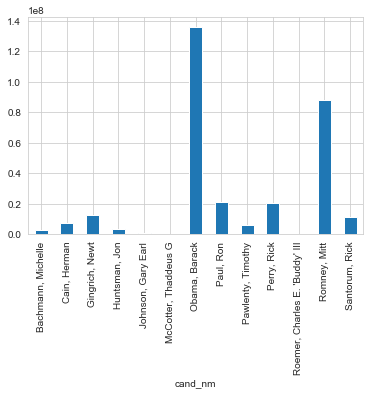

In [59]:
cand_amount.plot(kind='bar')

From this, we can see that Obama raised significantly more than the next highest candidate (Mitt Romney). Obviously, a large part of this can be contributed to the fact that there were many Republican candidates running, but only one Democractic candidate (the incumbent candidate, of course), so Republican contributions were spread out. To see how party-wide contributions compared, we can group our data by party, calculate the sum, then plot out result:

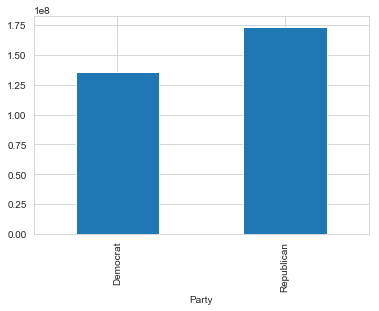

In [91]:
df_donor.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar')

It looks like despite Obama raising more money than Mitt Romney, Republican donations for the 2012 election were still greater than Democrat donations by almost 50 million (1e8 is 100 million, and the difference looks to be about 5e7, which is 50 million).

## Donations by Occupation

Now we can try and see if there were any particular occupations that had a heavy part in donating during the election. First, let's create a pivot table that will group the donation amount by occupation for each party.

In [61]:
df_occupation = df_donor.pivot_table('contb_receipt_amt',
                                     index='contbr_occupation',
                                     columns='Party',
                                     aggfunc='sum')

In [62]:
df_occupation.tail()

Party,Democrat,Republican
contbr_occupation,,
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN
\NONE\,NaN,250.0
~,NaN,75.0


In [63]:
df_occupation.shape

(45067, 2)

Since there are 45,000 different occupations in this DataFrame, visualizing this would be a nightmare. Let's focus our scope a little, and focus on occupations where the sum of donations between both parties is over 1 million.

In [64]:
df_occupation = df_occupation[df_occupation.sum(1) > 1000000]

In [65]:
df_occupation.shape

(31, 2)

This looks a lot easier to manage in terms of visualization. So let's plot this data and see what we can find:

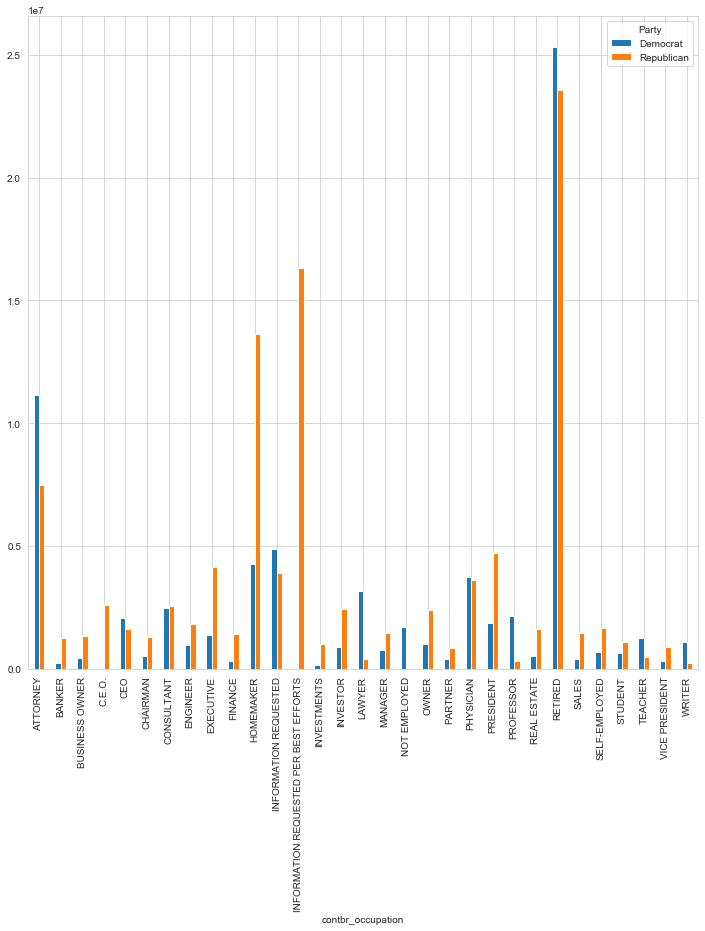

In [67]:
df_occupation.plot(kind='bar', figsize=(12,12))

Given how many occupations we have, let's stack the bars vertically, and use a more fitting color map:

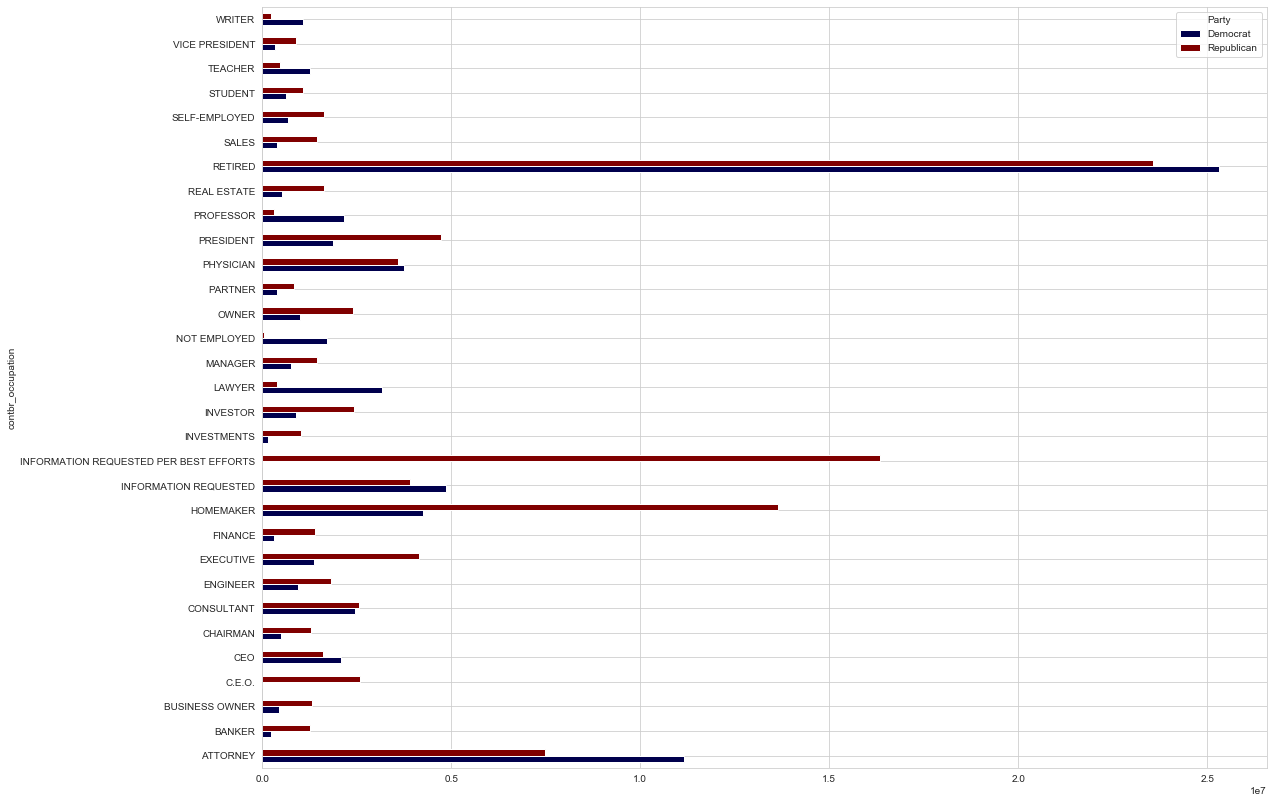

In [68]:
df_occupation.plot(kind='barh',figsize=(18,14),cmap='seismic')

Taking a look at this plot, we can still reduce the number of occupations that we have in this chart. For example the occupations saying "INFORMATION REQUESTED" doesn't really help us, since we don't know what occupations could be contained in that value. Also, "CEO" is listed twice, with different spellings. We can condense these into one category. Let's make these adjustments:

In [69]:
df_occupation.drop(['INFORMATION REQUESTED PER BEST EFFORTS', 'INFORMATION REQUESTED'],axis=0,inplace=True)

In [70]:
df_occupation.loc['CEO'] - df_occupation.loc['CEO'] + df_occupation.loc['C.E.O.']

df_occupation.drop('C.E.O.',inplace=True)

Now that we've cleaned up the categories more, let's create our bar chart again:

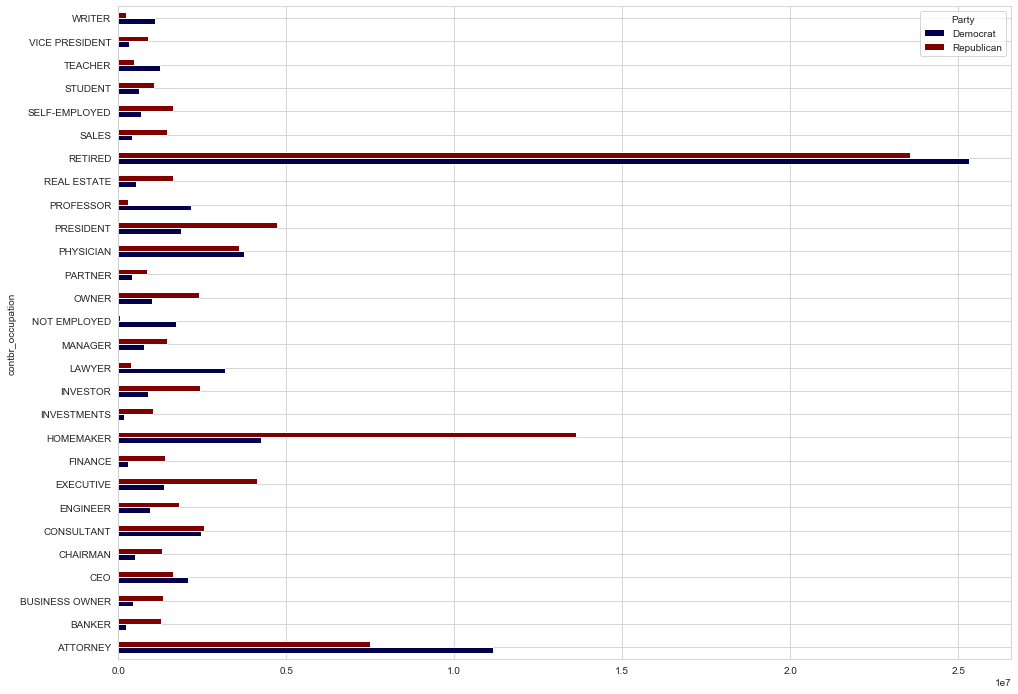

In [71]:
df_occupation.plot(kind='barh',figsize=(16,12),cmap='seismic')

Here, we see that people who are retired contributed the most to the election for both parties. We also notice that among homemakers, a Republican contribution is signfiicantly more likely than a Democrat contribution.

### Takeaways

Similar to the last dataset, we were able to do a lot of work on it, yet there are still mroe ideas we can use to further analyze our data:
- For our occupations graph, we could have created a mapping of specific occupations to more generalzied fields and see how those fields compared in terms of party contribution amounts.
- We could analyze buckets of donation rnages and see which candidates/parties were more popular amount certain donation amounts.